In [10]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import spectral_cube

plt.style.use('paper')

# plotting fitted gaussians
def gaussian(x, pars):
    a,b,c = pars
    return a*np.exp(-np.power(x-b, 2) / (2*np.power(c, 2)))

In [17]:
cube_ha = spectral_cube.SpectralCube.read('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m_bubble/h40a.12M.K.kms.galactic.fits')
cube_ha = cube_ha.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = cube.hdu.header['RESTFRQ'] * u.Hz)
cube_ha.allow_huge_operations=True

cube_hnco = spectral_cube.SpectralCube.read('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.fits')
cube_hnco = cube_hnco.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 8.792523800000E+10 * u.Hz)
cube_hnco.allow_huge_operations=True

In [18]:
cube_hnco

SpectralCube with shape=(361, 1612, 1781) and unit=K:
 n_x:   1781  type_x: GLON-TAN  unit_x: deg    range:     0.632348 deg:    0.914184 deg
 n_y:   1612  type_y: GLAT-TAN  unit_y: deg    range:    -0.318890 deg:   -0.063816 deg
 n_s:    361  type_s: VRAD      unit_s: km / s  range:      -50.000 km / s:     130.000 km / s

In [19]:
l = 0.824312723
b =  -0.190358071
width = 1.1719/3600
height = 1.1719/3600
region_str = "galactic; circle(%s, %s, %s\")" %(l,b,width*3600) 

sub_cube_ha = cube_ha.subcube_from_ds9region(region_str)
sub_cube_hnco = cube_hnco.subcube_from_ds9region(region_str)

The DS9Parser class is deprecated and may be removed in a future version.
        Use `regions.Regions.parse` instead.
The DS9Parser class is deprecated and may be removed in a future version.
        Use `regions.Regions.parse` instead.


In [20]:
cube_v_ha = sub_cube_ha.spectral_axis
cube_v_hnco = sub_cube_hnco.spectral_axis

mean_cube_ha = sub_cube_ha.mean(axis = (1, 2))
mean_cube_hnco = sub_cube_hnco.mean(axis = (1, 2))

This function (<function BaseSpectralCube.mean at 0x7f8b83a46430>) requires loading the entire cube into memory and may therefore be slow.
This function (<function BaseSpectralCube.mean at 0x7f8b83a46430>) requires loading the entire cube into memory and may therefore be slow.


Slice (slice(None, None, None), None) cannot be used on this 1-dimensional array's WCS.  If this is intentional, you  should use this <class 'spectral_cube.lower_dimensional_structures.OneDSpectrum'>'s ``array``  or ``quantity`` attribute.


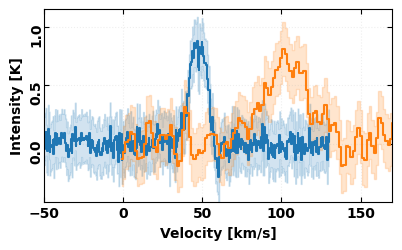

In [37]:
fig, ax = plt.subplots(1,1, figsize=(4.5,2.5))

ax.plot(cube_v_hnco, mean_cube_hnco/4, ds='steps-mid')
ax.plot(cube_v_ha, mean_cube_ha, ds='steps-mid')

rms1 = np.nanstd(mean_cube_hnco/4)
ax.fill_between(cube_v_hnco.value, mean_cube_hnco.value/4+rms1.value, mean_cube_hnco.value/4-rms1.value, lw=1, alpha=0.2, zorder=-1, color='C0', step='mid')

rms1 = np.nanstd(mean_cube_ha)
ax.fill_between(cube_v_ha.value, mean_cube_ha.value+rms1.value, mean_cube_ha.value-rms1.value, lw=1, alpha=0.2, zorder=-1, color='C1', step='mid')

ax.set_xlim([-50, 170])
ax.set_ylim([-0.49, 1.15])
ax.grid(':', alpha=0.2)

ax.set_ylabel('Intensity [K]')
ax.set_xlabel('Velocity [km/s]')

for axis in fig.get_axes():
    axis.tick_params(axis='y', labelrotation=90, pad=0)
    
# saving figure
plt.savefig('../figures/hnco_ha_spec.pdf')